<a href="https://colab.research.google.com/github/samindelhi/CNN-Exercises/blob/main/Getting_Started_YOLO_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation Transfer learning with YOLOv11
![yolo](https://cdn.prod.website-files.com/680a070c3b99253410dd3df5/680a070c3b99253410dd4791_67ed5670d7ecbda0527fe8b3_66f680814693dd5c3b60dfcb_YOLO11_Thumbnail.png)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a model
model = YOLO("yolo11m-seg.pt")  # load an official model

100%|██████████| 43.3M/43.3M [00:00<00:00, 121MB/s]


In [ ]:
# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image



100%|██████████| 134k/134k [00:00<00:00, 8.44MB/s]


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1709.9ms
Speed: 21.2ms preprocess, 1709.9ms inference, 54.0ms postprocess per image at shape (1, 3, 640, 480)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [ ]:
# Access the results
for result in results:
    xy = result.masks.xy  # mask in polygon format
    xyn = result.masks.xyn  # normalized
    masks = result.masks.data  # mask in matrix format (num_objects x H x W)
    print(xy)
    print(xyn)
    print(masks)

[array([[     200.81,      226.12],
       [     200.81,      231.19],
       [     199.12,      232.88],
       ...,
       [     298.69,      232.88],
       [        297,      231.19],
       [        297,      226.12]], dtype=float32), array([[     104.62,      401.62],
       [     104.62,      408.38],
       [     102.94,      410.06],
       [     102.94,      413.44],
       [     101.25,      415.12],
       [     101.25,      420.19],
       [     99.562,      421.88],
       [     99.562,      430.31],
       [     97.875,         432],
       [     97.875,      440.44],
       [     96.188,      442.12],
       [     96.188,      450.56],
       [       94.5,      452.25],
       [       94.5,      455.62],
       [     92.812,      457.31],
       [     92.812,      460.69],
       [     91.125,      462.38],
       [     91.125,      464.06],
       [     69.188,         486],
       [     69.188,      487.69],
       [     64.125,      492.75],
       [     64.125,     

In [ ]:
# Plot the results on the original image
img_with_masks = results[0].plot()

# Or save the plotted image
results[0].save('bus_with_masks.jpg')

'bus_with_masks.jpg'

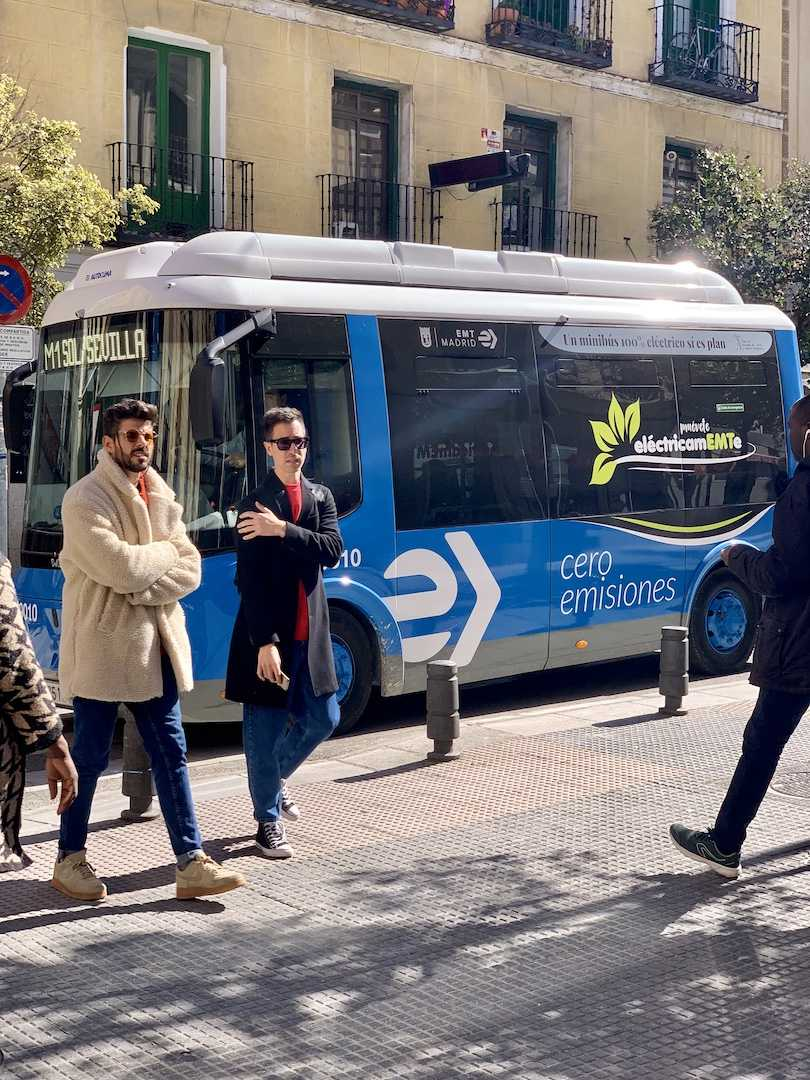

In [ ]:
from IPython.display import Image, display
display(Image(filename='bus.jpg'))

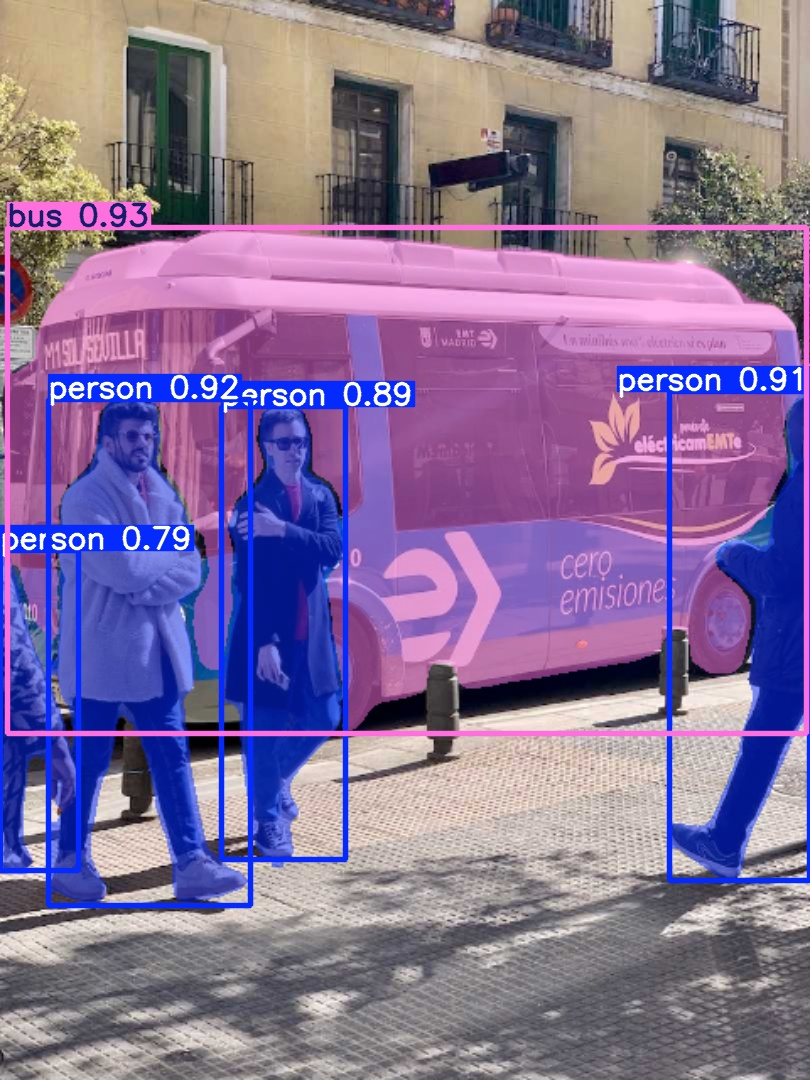

In [ ]:
from IPython.display import Image, display
display(Image(filename='bus_with_masks.jpg'))

X-Large Model

In [ ]:
# Load a model
model1 = YOLO("yolo11x-seg.pt")  # load an official model

100%|██████████| 119M/119M [00:00<00:00, 128MB/s]


In [ ]:
import requests
import os

def download_image(url, filename):
  """Downloads an image from a given URL and saves it to a file using requests.

  Args:
    url: The URL of the image.
    filename: The name of the file to save the image to.
  """
  try:
    # Add a User-Agent header to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers, stream=True)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    with open(filename, 'wb') as out_file:
        for chunk in response.iter_content(chunk_size=8192):
            out_file.write(chunk)

    print(f"Image downloaded successfully to {filename}")
  except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

# Now call the modified download_image function
download_image("https://images.pexels.com/photos/13872248/pexels-photo-13872248.jpeg", "pexels-photo-13872248.jpg")



Image downloaded successfully to pexels-photo-13872248.jpg


In [ ]:
# Predict with the model
results1 = model1("/content/pexels-photo-13872248.jpg")


image 1/1 /content/pexels-photo-13872248.jpg: 448x640 6 persons, 1 bottle, 3298.4ms
Speed: 4.4ms preprocess, 3298.4ms inference, 20.4ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
# Plot the results on the original image
img_with_masks = results1[0].plot()

# Or save the plotted image
results1[0].save('pexels.jpg')

'pexels.jpg'

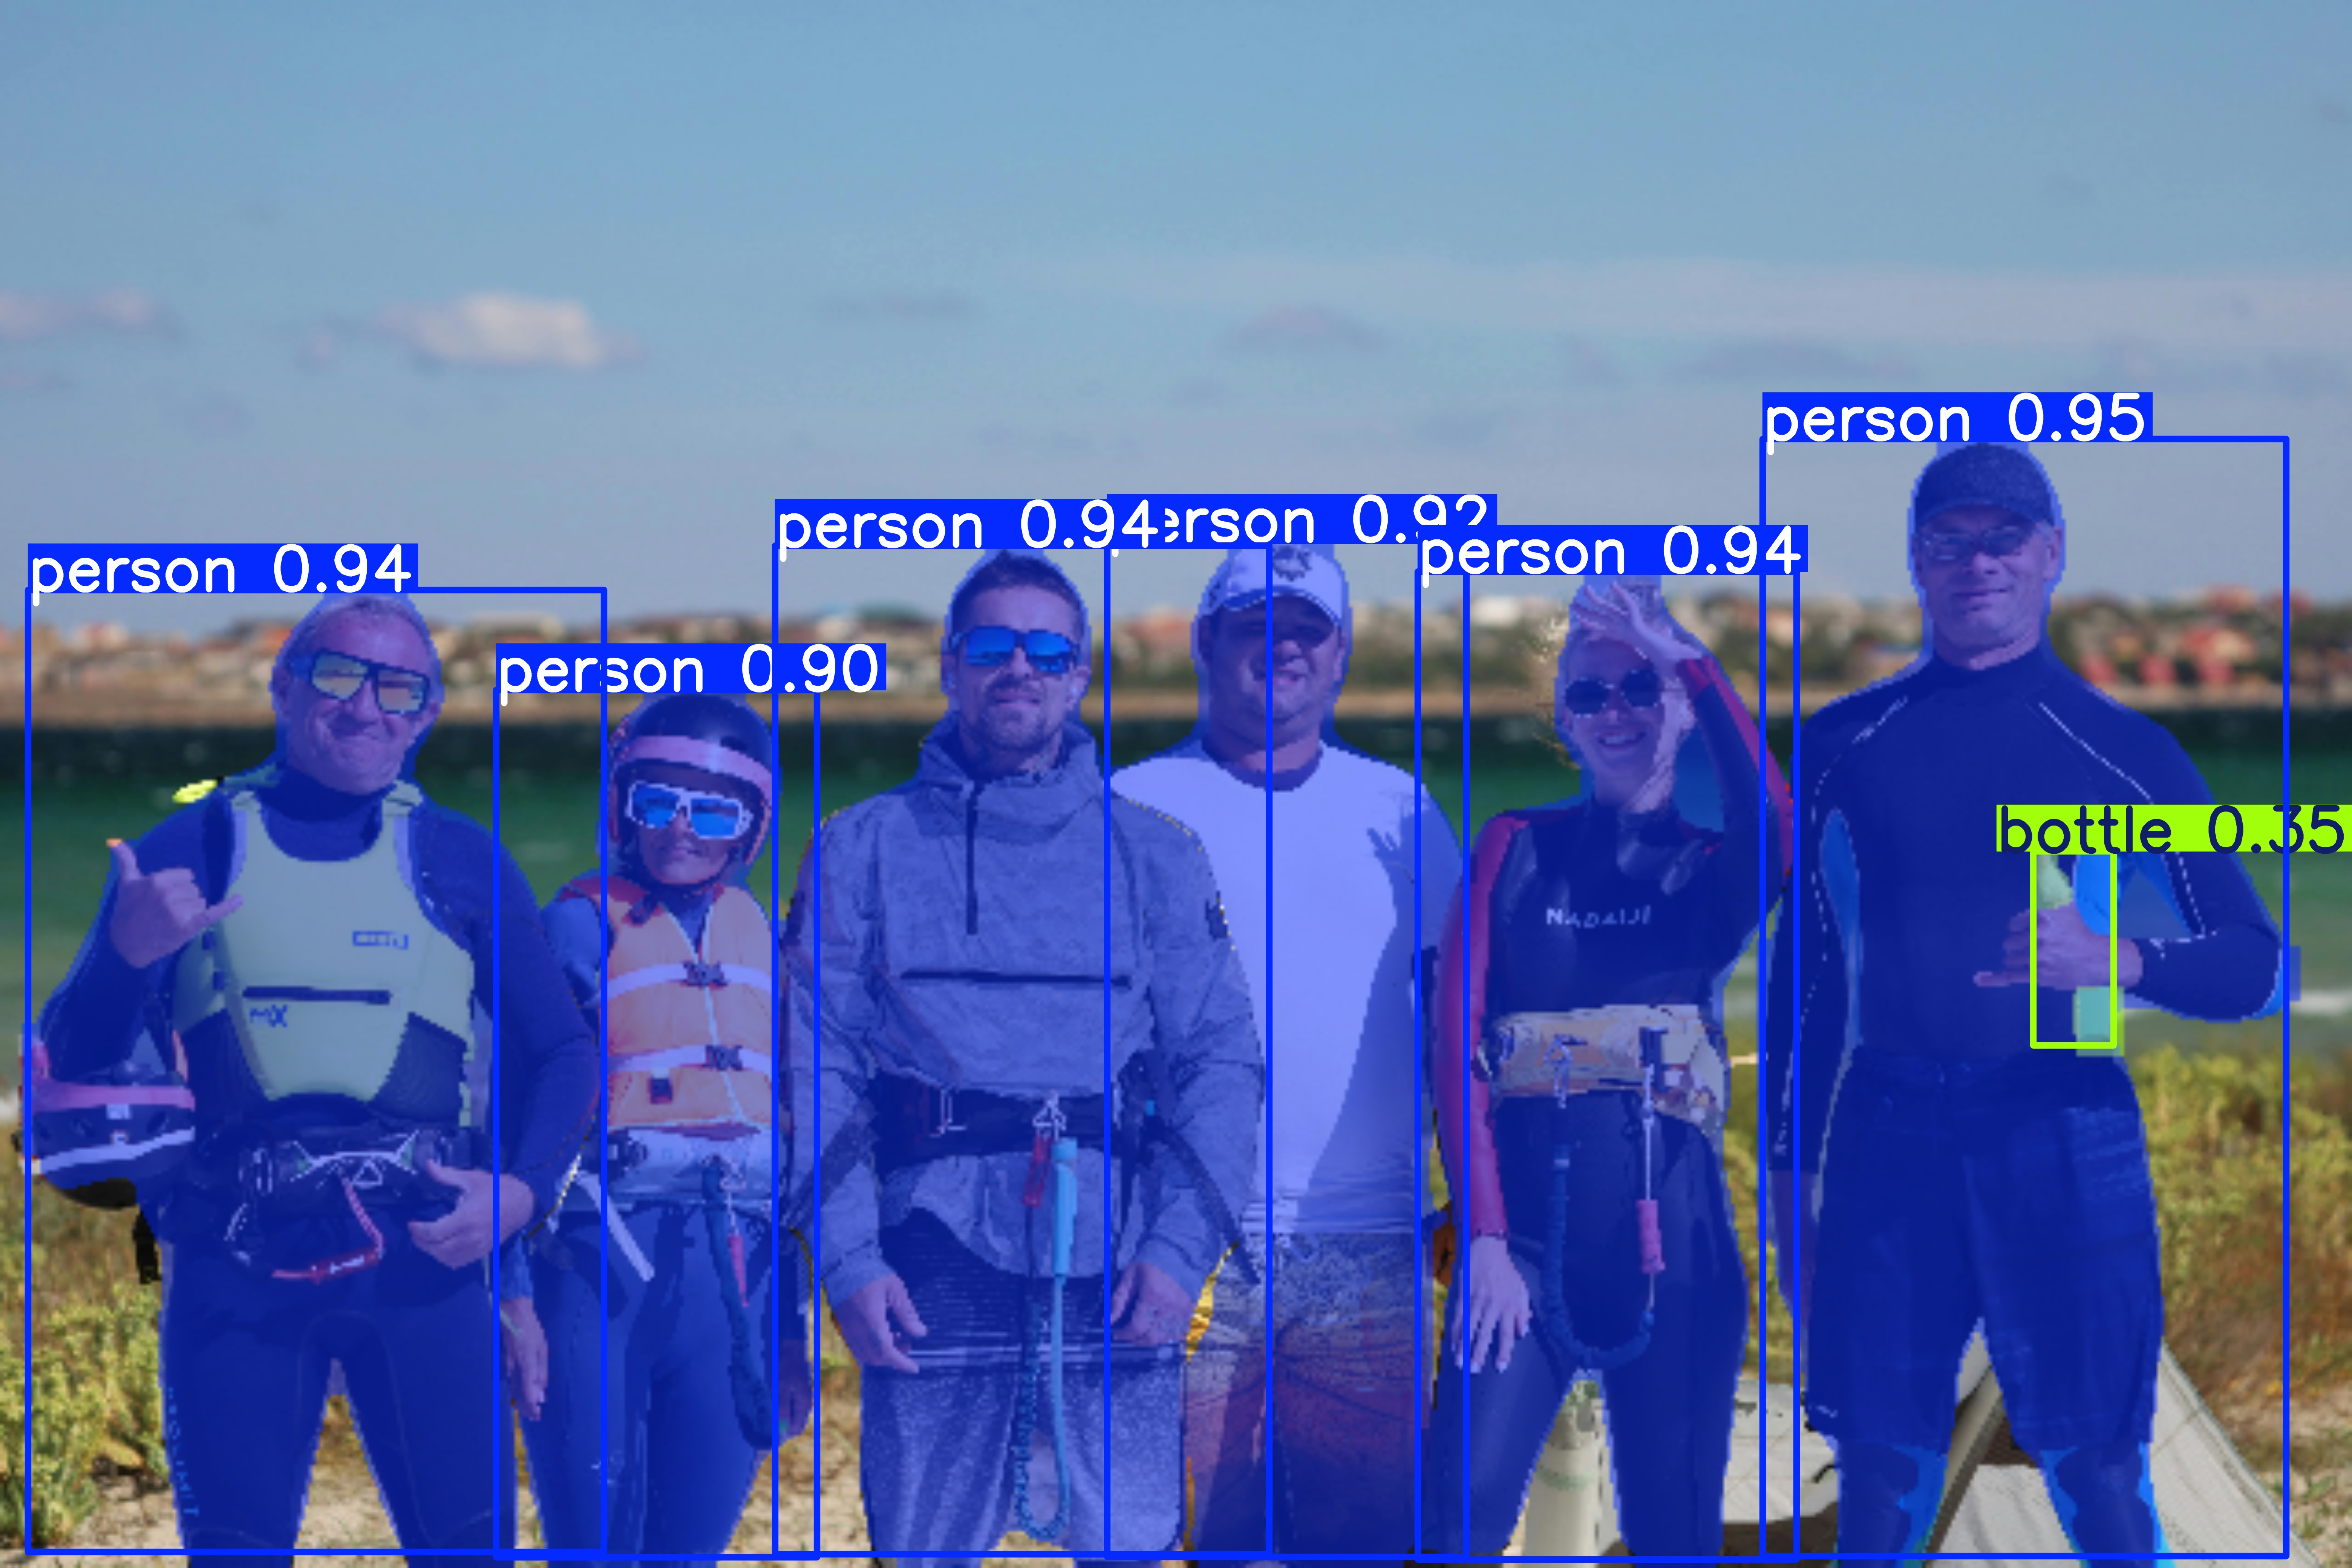

In [ ]:
from IPython.display import Image, display
display(Image(filename='pexels.jpg'))